<a href="https://colab.research.google.com/github/Gushinta/capstone_module1/blob/main/Capstone_Modul1_Gushinta_Nena_Hargianti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Reading And Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import re
import os
import csv
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/Gushinta/capstone_module1.git

Cloning into 'capstone_module1'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 0), reused 7 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (18/18), 81.85 MiB | 12.37 MiB/s, done.


In [3]:
# unzip file data_source.zip
!unzip /content/capstone_module1/data/data_sources.zip -d /content/data

Archive:  /content/capstone_module1/data/data_sources.zip
   creating: /content/data/data_sources/
   creating: /content/data/data_sources/data_products/
   creating: /content/data/data_sources/data_reqruitment/
  inflating: /content/data/data_sources/data_products/Suitcases and Trolley Bags.csv  
  inflating: /content/data/data_sources/data_products/Amazon Fashion.csv  
  inflating: /content/data/data_sources/data_products/Kitchen Storage and Containers.csv  
  inflating: /content/data/data_sources/data_products/Coffee Tea and Beverages.csv  
  inflating: /content/data/data_sources/data_products/Running.csv  
  inflating: /content/data/data_sources/data_products/The Designer Boutique.csv  
  inflating: /content/data/data_sources/data_products/Kids Watches.csv  
  inflating: /content/data/data_sources/data_products/Fashion Sandals.csv  
  inflating: /content/data/data_sources/data_products/Indian Language Books.csv  
  inflating: /content/data/data_sources/data_products/Sportswear.csv 

# **Case study : data_requitment**



## Data Information

In [4]:
# Menampilkan data requitment
req = pd.read_csv('/content/data/data_sources/data_reqruitment/data_requirements.csv')
baris, kolom = req.shape
print(f'Jumlah baris : {baris}')
print(f'Jumlah kolom : {kolom}')
req.head()

Jumlah baris : 1555
Jumlah kolom : 14


,Unnamed: 0,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates
0,0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,"$70,000 /yr (est.)",501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
1,1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,$42.50 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 00:00:00+07:00
2,2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,$67.50 /hr (est.),51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
3,3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1976.0,$10+ billion (USD),2024-06-12 00:00:00-05:00
4,4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,$65.00 /hr (est.),1 to 50 Employees,Company - Public,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-04:00


In [5]:
# melihat informasi data requitment
req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1555 non-null   int64  
 1   company           1551 non-null   object 
 2   company_rating    1358 non-null   float64
 3   location          1554 non-null   object 
 4   job_title         1554 non-null   object 
 5   job_description   1554 non-null   object 
 6   salary_estimate   1277 non-null   object 
 7   company_size      1442 non-null   object 
 8   company_type      1442 non-null   object 
 9   company_sector    1260 non-null   object 
 10  company_industry  1260 non-null   object 
 11  company_founded   1131 non-null   float64
 12  company_revenue   1442 non-null   object 
 13  dates             1555 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 170.2+ KB


Data terdiri dari 1555 baris dan 14 kolom, terlihat juga informasi mengenai type data pada setiap kolom.

In [6]:
# Menampikan jumlah kategori pada setiap kolom data
for col in req.columns:
    print(col,': ', len(set(req[col].unique())), 'kategori')

Unnamed: 0 :  1555 kategori
company :  1237 kategori
company_rating :  34 kategori
location :  420 kategori
job_title :  782 kategori
job_description :  1553 kategori
salary_estimate :  956 kategori
company_size :  9 kategori
company_type :  13 kategori
company_sector :  26 kategori
company_industry :  84 kategori
company_founded :  169 kategori
company_revenue :  11 kategori
dates :  140 kategori


## Data Processing and Transformation

In [7]:
# meng-copy data requitment, untuk di analisis lebih lanjut
req2 = req.copy()

In [8]:
# menampilkan value unique dari kolom Unnamed: 0
print(req2['Unnamed: 0'].unique())

[   0    1    2 ... 1552 1553 1554]


Karena kolom `Unnamed: 0` diindikasikan sebagai index maka kolom ini dapat dihapus.

In [9]:
# menghilangkan kolom Unnamed: 0
req2.drop("Unnamed: 0", axis='columns', inplace=True)

In [10]:
# menampilan value unique salary_estimate
print(req2['salary_estimate'].unique())

['$70,000 /yr (est.)' '$42.50 /hr (est.)' '$67.50 /hr (est.)' nan
 '$65.00 /hr (est.)' '$237,500 /yr (est.)' '$94,536 /yr (est.)'
 '$105,700 /yr (est.)' '$77.00 /hr (est.)' '$62.50 /hr (est.)'
 '$115,797 /yr (est.)' '$81,338 /yr (est.)' '$102,500 /yr (est.)'
 '$55.00 /hr (est.)' '$48.00 /hr (est.)' '$147,900 /yr (est.)'
 '$73.00 /hr (est.)' '$89,080 /yr (est.)' '$98,163 /yr (est.)'
 '$99,876 /yr (est.)' '$72,500 /yr (est.)' '$64,000 /yr (est.)'
 '$138,500 /yr (est.)' '$150,000 /yr (est.)' '$60.00 /hr (est.)'
 '$30.00 /hr (est.)' '$98,800 /yr (est.)' '$85,882 /yr (est.)'
 '$115,786 /yr (est.)' '$122,989 /yr (est.)' '$85.00 /hr (est.)'
 '$108,451 /yr (est.)' '$57.50 /hr (est.)' '$135,927 /yr (est.)'
 '$147,500 /yr (est.)' '$47.50 /hr (est.)' '$85,894 /yr (est.)'
 '$35.00 /hr (est.)' '$74,927 /yr (est.)' '$70.00 /hr (est.)'
 '$140,000 /yr (est.)' '$101,755 /yr (est.)' '$125,500 /yr (est.)'
 '$68.00 /hr (est.)' '$84,277 /yr (est.)' '$101,076 /yr (est.)'
 '$92,898 /yr (est.)' '$54.00 /hr (e

Pada kolom `salary_estimate` nilainya belum standar (pertahun dan perjam) maka, dibuat suatu fungsi untuk menghitung estimasi gaji menggunakan standar tahunan.

In [11]:
# Fungsi untuk menghitung estimasi gaji per-tahun
def calculate_salary_estimate(row):
    salary_estimate = str(row['salary_estimate'])
    if '/hr' in salary_estimate:
        # mencari dan mengubah estimasi gaji per-jam menjadi per-tahun
        hourly_rate = float(salary_estimate.replace('$', '').split()[0].replace(',', ''))
        return hourly_rate * 40 * 52  # 40 jam per minggu, 52 minggu
    if '/mo' in salary_estimate:
        # mencari dan mengubah estimasi gaji per-bulan menjadi per-tahun
        monthly_rate = float(salary_estimate.replace('$', '').split()[0].replace(',', ''))
        return monthly_rate * 12   # 12 bulan
    elif '/yr' in salary_estimate:
        # menghasilkan estimasi gaji per-tahun
        return float(salary_estimate.replace('$', '').split()[0].replace(',', ''))
    return None  # Jika tidak sesuai

In [12]:
req2['year_salary_estimation'] = req2.apply(calculate_salary_estimate, axis=1)
print(req2[['salary_estimate', 'year_salary_estimation']].head(5))

      salary_estimate  year_salary_estimation
0  $70,000 /yr (est.)                 70000.0
1   $42.50 /hr (est.)                 88400.0
2   $67.50 /hr (est.)                140400.0
3                 NaN                     NaN
4   $65.00 /hr (est.)                135200.0


In [13]:
# menampilan value unique location
print(req2['location'].unique())

['Riverside, CA' 'Newton, MS' 'Remote' 'Cupertino, CA' 'Baltimore, MD'
 'New York, NY' 'Westwood, MA' 'San Francisco, CA' 'Alpharetta, GA'
 'Irving, TX' 'Boston, MA' 'Salt Lake City, UT' 'Braham, MN'
 'East Hartford, CT' 'Dallas, TX' 'Arlington, VA' 'Framingham, MA'
 'Syracuse, NY' 'Princeton, NJ' 'Washington, DC' 'Menlo Park, CA'
 'Redlands, CA' 'Austin, TX' 'Richmond, VA' 'Atlanta, GA'
 'Berkeley Heights, NJ' 'South Milwaukee, WI' 'Chicago, IL'
 'Richville, MN' 'McLean, VA' 'Oakland, CA' 'Glen Allen, VA' 'Newark, NJ'
 'Dekalb, IL' 'Beaverton, OR' 'Plainsboro, NJ' 'Los Angeles, CA'
 'Pittsburgh, PA' 'Mahwah, NJ' 'Murray, UT' 'Santa Clara, CA' 'Plano, TX'
 'Madison, WI' 'Mount Laurel, NJ' 'Cleveland, OH' 'Minneapolis, MN'
 'Santa Ana, CA' 'Rockville, MD' 'Dover, DE' 'Brentwood, TN' 'Edison, NJ'
 'Jersey City, NJ' 'Hanover, NJ' 'Imperial, CA' 'West Point, NY'
 'United States' 'South San Francisco, CA' 'Coppell, TX' 'Lehi, UT'
 'Columbia, SC' 'Tulsa, OK' 'Denver, CO' 'Getzville, NY' 'Ham

Pada kolom `location` akan dibuat 2 kategori yaitu On-site dan Remote berdasarkan lokasi kerjanya.

In [14]:
# Fungsi untuk memisahkan lokasi kerja
def categorize_work_location(location):
    if 'Remote' in location:
        return 'Remote'
    else:
        return 'On-site'
req2['location']=req2['location'].astype(str)

In [15]:
# Menerapkan fungsi untuk membuat kolom baru
req2['work_type'] = req2['location'].apply(categorize_work_location)
print(req2[['location', 'work_type']].head(5))

        location work_type
0  Riverside, CA   On-site
1     Newton, MS   On-site
2         Remote    Remote
3  Cupertino, CA   On-site
4  Baltimore, MD   On-site


In [16]:
# melihat dataframe dengan kolom baru
req2.head(5)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates,year_salary_estimation,work_type
0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,"$70,000 /yr (est.)",501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00,70000.0,On-site
1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,$42.50 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 00:00:00+07:00,88400.0,On-site
2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,$67.50 /hr (est.),51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00,140400.0,Remote
3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1976.0,$10+ billion (USD),2024-06-12 00:00:00-05:00,NaN,On-site
4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,$65.00 /hr (est.),1 to 50 Employees,Company - Public,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-04:00,135200.0,On-site


In [17]:
# menampilan value unigue pada kolom dates
print(req2['dates'].unique())

['2024-06-12 00:00:00-10:00' '2024-06-12 00:00:00+07:00'
 '2024-06-12 00:00:00-05:00' '2024-06-12 00:00:00-04:00'
 '2024-06-12 00:00:00+08:00' '2024-06-12 00:00:00+10:00'
 '2024-06-12 00:00:00+01:00' '2024-06-13 00:00:00+01:00'
 '2024-06-13 00:00:00-05:00' '2024-06-13 00:00:00+07:00'
 '2024-06-13 00:00:00+10:00' '2024-06-13 00:00:00-10:00'
 '2024-06-13 00:00:00+08:00' '2024-06-13 00:00:00-04:00'
 '2024-06-14 00:00:00-10:00' '2024-06-14 00:00:00-05:00'
 '2024-06-14 00:00:00+01:00' '2024-06-14 00:00:00-04:00'
 '2024-06-14 00:00:00+08:00' '2024-06-14 00:00:00+07:00'
 '2024-06-14 00:00:00+10:00' '2024-06-15 00:00:00+10:00'
 '2024-06-15 00:00:00+08:00' '2024-06-15 00:00:00+07:00'
 '2024-06-15 00:00:00-05:00' '2024-06-15 00:00:00+01:00'
 '2024-06-15 00:00:00-04:00' '2024-06-15 00:00:00-10:00'
 '2024-06-16 00:00:00-04:00' '2024-06-16 00:00:00+01:00'
 '2024-06-16 00:00:00+10:00' '2024-06-16 00:00:00+07:00'
 '2024-06-16 00:00:00-05:00' '2024-06-16 00:00:00+08:00'
 '2024-06-16 00:00:00-10:00' '2

Kolom dates akan di standarize menjadi zona waktu America/New_York.

In [18]:
# Mengubah kolom 'dates' menjadi tipe datetime yang dengan timezone
req2['dates'] = pd.to_datetime(req2['dates'], utc=True)

# Mengonversi ke zona waktu America/New_York
req2['dates'] = req2['dates'].dt.tz_convert('America/New_York')

In [19]:
# menampilan value unique company_founded
print(req2['company_founded'].unique())

[  nan 1976. 2000. 1998. 1994. 2018. 2019. 1972. 2010. 1982. 2003. 2013.
 1964. 1969. 2009. 2015. 1984. 1986. 1844. 2012. 1999. 1946. 2007. 2020.
 2011. 1970. 2016. 2017. 1938. 2006. 2001. 2014. 1965. 2022. 1784. 1836.
 1879. 1926. 1967. 1983. 1849. 1943. 1858. 1916. 1799. 1940. 1971. 1980.
 1953. 1876. 1992. 1991. 2008. 1851. 1928. 1960. 1975. 1973. 1911. 1947.
 1892. 1830. 1792. 1915. 1995. 1850. 1963. 1959. 1902. 1903. 1918. 1900.
 1885. 1978. 1899. 1853. 2004. 1989. 2002. 1864. 1955. 1898. 1997. 2005.
 1968. 1993. 1996. 1901. 2021. 1962. 1917. 1942. 1872. 1690. 1877. 1934.
 1930. 1921. 1985. 1894. 1990. 1875. 1860. 1966. 1936. 1987. 1636. 1977.
 1910. 1852. 1961. 1937. 1939. 1925. 1841. 1979. 1933. 1988. 1948. 1897.
 1929. 1810. 1935. 1914. 1913. 1957. 1888. 1923. 1905. 1922. 1954. 1958.
 1906. 1874. 1919. 1866. 1974. 1931. 1863. 1870. 1859. 1949. 1838. 1909.
 1883. 1920. 1907. 1952. 1956. 1945. 1951. 1710. 1865. 1837. 1891. 1927.
 1812. 1856. 1861. 1887. 1855. 1889. 1884. 1882. 18

Diasumsikan bahwa kolom `company_founded` merupakan tahun berdirinya suatu company, maka akan diubah type datanya menjadi int.

In [20]:
# merubah tipe data kolom company_founded
req2['company_founded'] = req2['company_founded'].astype('Int64')

In [21]:
# meng-cek kolom company_founded kembali
req2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype                           
---  ------                  --------------  -----                           
 0   company                 1551 non-null   object                          
 1   company_rating          1358 non-null   float64                         
 2   location                1555 non-null   object                          
 3   job_title               1554 non-null   object                          
 4   job_description         1554 non-null   object                          
 5   salary_estimate         1277 non-null   object                          
 6   company_size            1442 non-null   object                          
 7   company_type            1442 non-null   object                          
 8   company_sector          1260 non-null   object                          
 9   company_industry        1260 n

**Missing Value**

Memeriksa missing value pada data untuk didiskusikan lebih lanjut tindakan apa yang harus dilakukan dalam penanganan masalah ini.

In [22]:
# melihat jumlah missing value pada data req
print(req.isnull().sum())

Unnamed: 0            0
company               4
company_rating      197
location              1
job_title             1
job_description       1
salary_estimate     278
company_size        113
company_type        113
company_sector      295
company_industry    295
company_founded     424
company_revenue     113
dates                 0
dtype: int64


In [23]:
# melihat jumlah missing value pada data req2
print(req2.isnull().sum())

company                     4
company_rating            197
location                    0
job_title                   1
job_description             1
salary_estimate           278
company_size              113
company_type              113
company_sector            295
company_industry          295
company_founded           424
company_revenue           113
dates                       0
year_salary_estimation    278
work_type                   0
dtype: int64


Memvisualisasikan missing value untuk menemukan pola pada data.

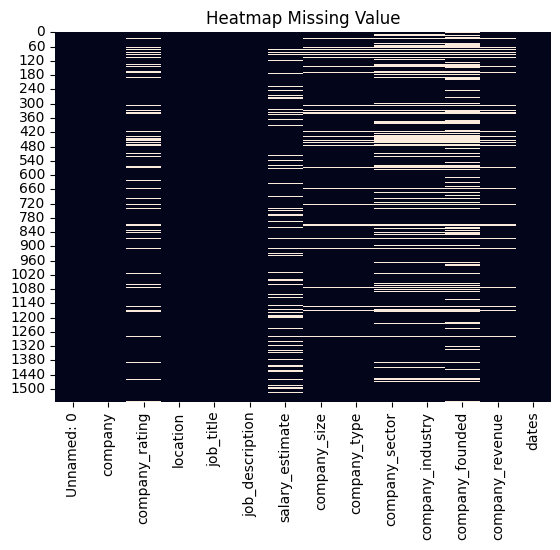

In [24]:
# visualisasi mv pada data req
sns.heatmap(req.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

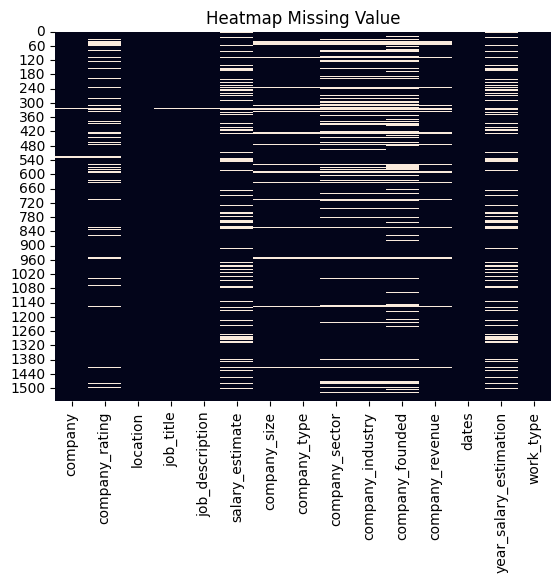

In [25]:
# visualisasi mv pada data req2
sns.heatmap(req2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

**Duplikasi Data**

In [26]:
# mengecek apakah ada duplikat data
print(req2.shape)
print("jumlah data yang duplikat", req2.duplicated().sum())
req2[req2.duplicated() == True].head()

(1555, 15)
jumlah data yang duplikat 0


,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates,year_salary_estimation,work_type


In [27]:
#Check Deskriptif Statistik
req2.describe()

,company_rating,company_founded,year_salary_estimation
count,1358.000000,1131.0,1277.000000
mean,3.925626,1975.934571,117845.777604
std,0.535826,51.461792,34697.316418
min,1.000000,1636.0,46800.000000
25%,3.600000,1965.0,94600.000000
50%,3.900000,1997.0,112144.000000
75%,4.200000,2009.0,134693.000000
max,5.000000,2022.0,432000.000000


## Visualisasi Data

Memvisualisasikan data kategorik dan numerik

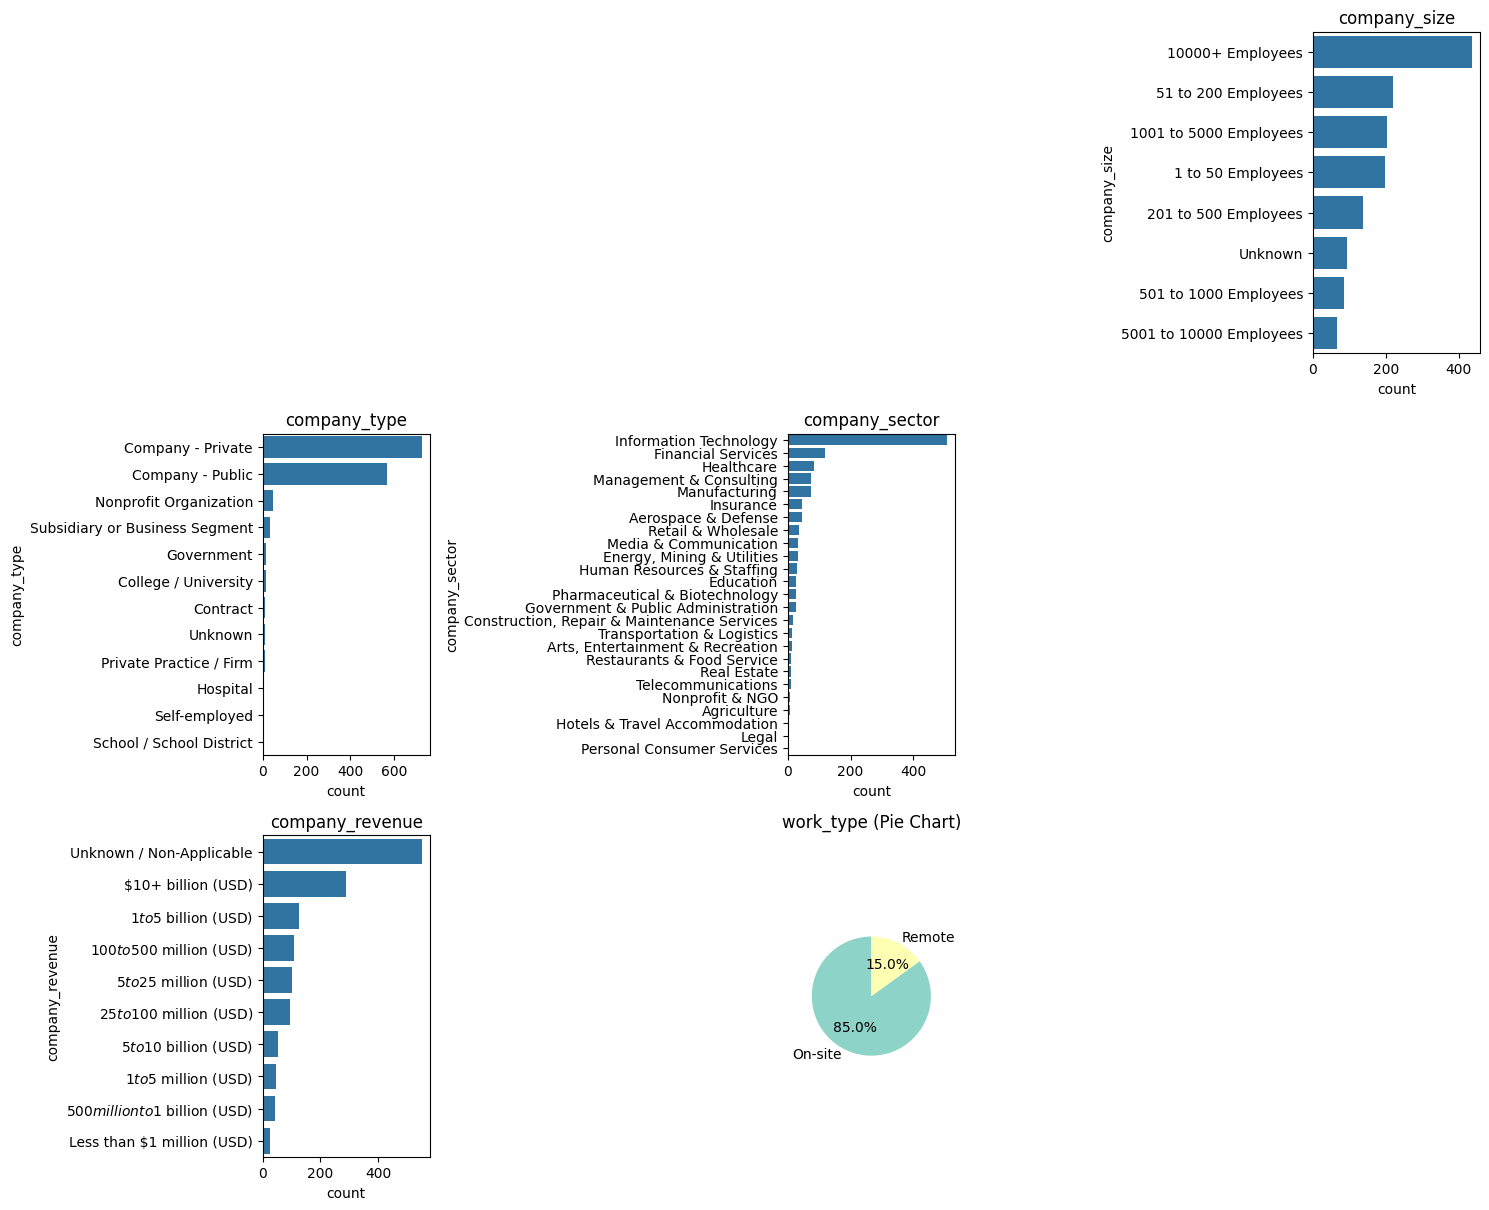

In [28]:
# visualisasi setiap variabel kategorik pada data

data_ = req2.select_dtypes(include = ['object', 'category'])
# Menghitung jumlah variabel kategorik
num_variables = len(data_.columns)

# Tentukan jumlah kolom dan baris untuk subplot
num_cols = 3
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Menggunakan Seaborn untuk membuat countplot atau pie chart
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = data_.columns[i]
        unique_vals = data_[col].nunique()

        # Jika kategori lebih dari 34, lewati
        if unique_vals > 34:
            fig.delaxes(ax)
            continue

        # Gunakan pie chart untuk kategori kurang dari 3
        elif unique_vals < 3:
            data = data_[col].value_counts()
            ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data)))
            ax.set_title(f'{col} (Pie Chart)')
            ax.axis('equal')  # Agar pie chart berbentuk lingkaran

        # Gunakan countplot untuk kategori 3 hingga 15
        else:
            sns.countplot(y=col, data=data_, ax=ax, order=data_[col].value_counts(ascending=False).index)
            ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

In [29]:
NumVar = req2.select_dtypes(include = ['int', 'float'])

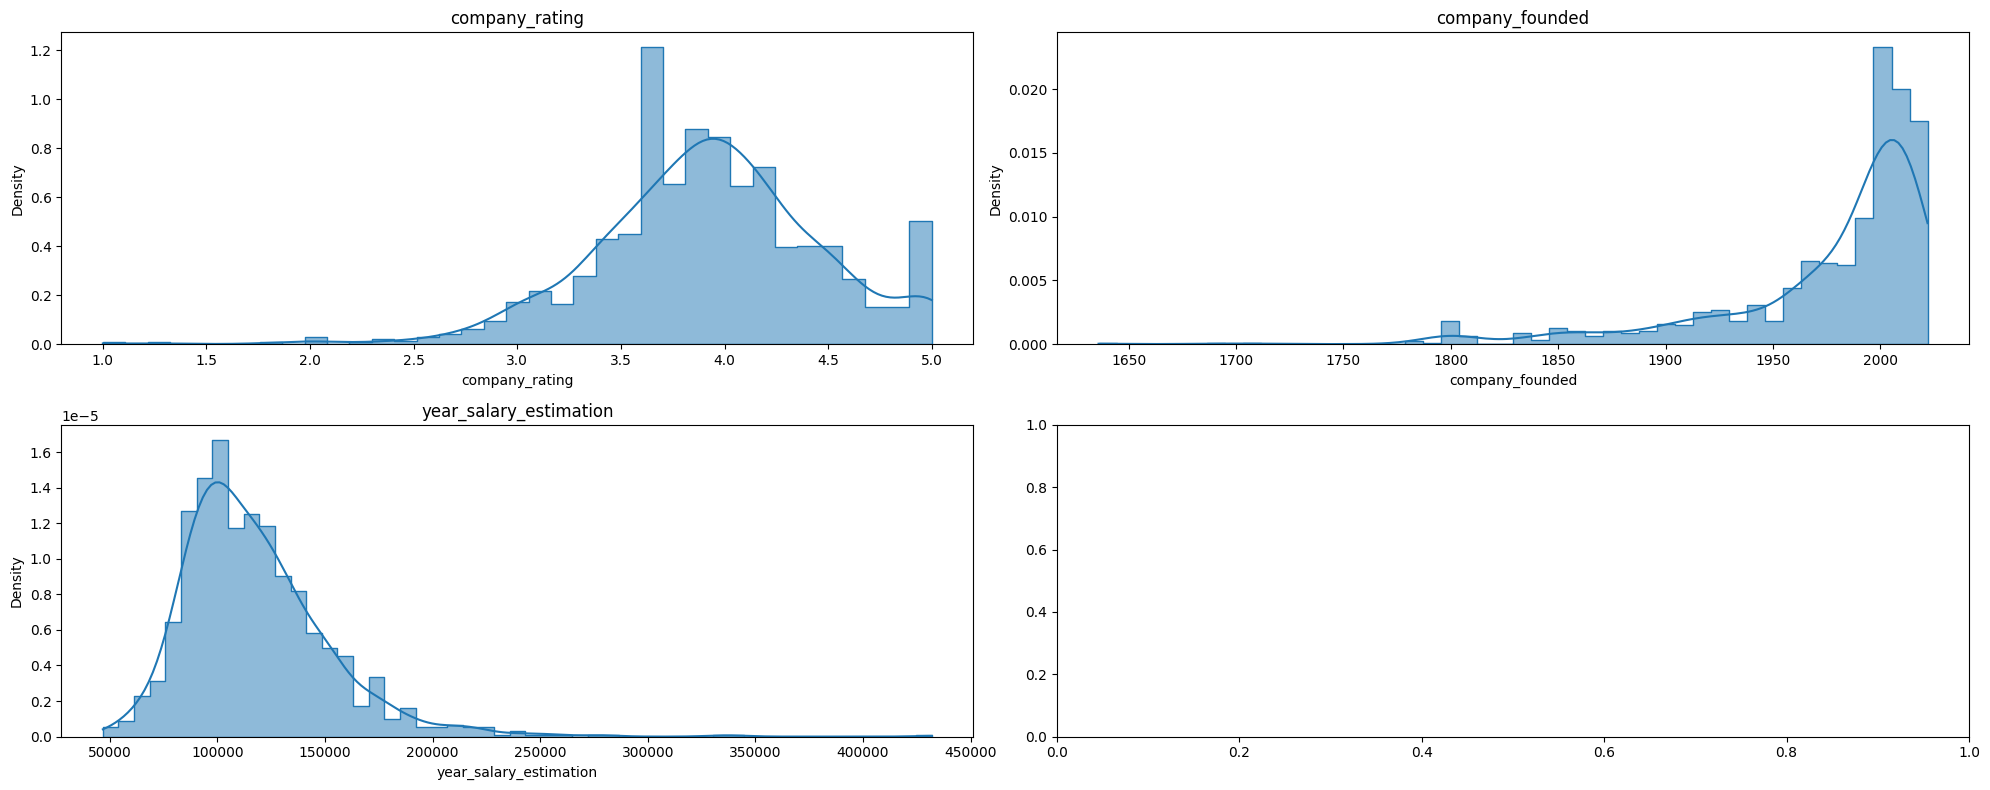

In [30]:
# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(NumVar.columns)):
    row, col = divmod(i, 2)
    sns.histplot(NumVar.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="density", common_norm=False)
    axes[row, col].set_title(NumVar.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

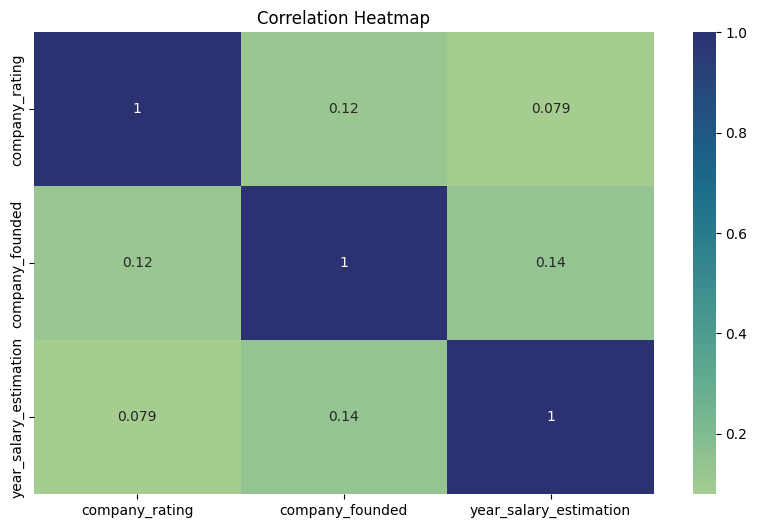

In [31]:
# Calculate correlations
correlations = NumVar.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

# **Case study : data_product**

## Data Concatenating

In [32]:
# membaca seluruh file dari folder data_product

def crawlFiles(dPath, types = None):
    #dPath = 'C:/Temp', types ='pdf'
    if types:
        return [dPath+'/'+f for f in os.listdir(dPath) if f.endswith('.'+types)]
    else:
        return [dPath+'/'+f for f in os.listdir(dPath)]

path = "/content/data/data_sources/data_products"

dataPath = crawlFiles(path, types = 'csv')

In [33]:
# melihat jumlah file data
len(dataPath)

140

In [34]:
# cek kolom data
test1 = pd.read_csv(dataPath[0])
print(test1.keys())

test2 = pd.read_csv(dataPath[67])
print(test2.keys())

test3 = pd.read_csv(dataPath[122])
print(test3.keys())

test4 = pd.read_csv(dataPath[139])
print(test4.keys())

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')
Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')


Setelah random check, diambil kesimpulan bahwa : 140 data memiliki kolom yang sama.

In [35]:
# cek kategori (sub_category) pada data dengan nama file, apakah sudah sesuai atau belum
print(dataPath[122])
print('\n')
test3.head(4)

/content/data/data_sources/data_products/Gold and Diamond Jewellery.csv




,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61klNXLzIR...,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,"1,186","₹64,649","₹72,800"
1,Bangalore Refinery 24k (999.9) 2 gm Yellow Gol...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61aRW4bh6U...,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,"4,392","₹13,145","₹13,200"
2,Malabar Gold & Diamonds 24k (999) Rose 1 gm Ye...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61VQiqakxY...,https://www.amazon.in/Malabar-Gold-Diamonds-ha...,4.6,493,"₹6,529","₹7,000"
3,Malabar Gold & Diamonds 24k (999) Rose 2 gm Ye...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/71h+Tize0o...,https://www.amazon.in/Malabar-Gold-Diamonds-Ro...,4.6,"1,334","₹12,809","₹13,629"


Setelah di cek nama file sesuai dengan kolom sub_category.

In [36]:
# cek dan menampilkan data .csv yang kosong
empty_files = []
for file in dataPath:
  with open(file, mode='r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)
    if len(rows) <= 1:  # jika kondisi ini "true" maka tidak ada data atau hanya header
       empty_files.append(file)

print(f"Jumlah file yang kosong: {len(empty_files)}")
print("File CSV yang kosong:")
for empty_file in empty_files:
    print(empty_file)

Jumlah file yang kosong: 27
File CSV yang kosong:
/content/data/data_sources/data_products/Exam Central.csv
/content/data/data_sources/data_products/All Video Games.csv
/content/data/data_sources/data_products/All Music.csv
/content/data/data_sources/data_products/PC Games.csv
/content/data/data_sources/data_products/Gaming Accessories.csv
/content/data/data_sources/data_products/School Textbooks.csv
/content/data/data_sources/data_products/All Hindi.csv
/content/data/data_sources/data_products/Blu-ray.csv
/content/data/data_sources/data_products/Sports Collectibles.csv
/content/data/data_sources/data_products/Indian Language Books.csv
/content/data/data_sources/data_products/Film Songs.csv
/content/data/data_sources/data_products/Fiction Books.csv
/content/data/data_sources/data_products/Kindle eBooks.csv
/content/data/data_sources/data_products/Subscribe and Save.csv
/content/data/data_sources/data_products/Indian Classical.csv
/content/data/data_sources/data_products/Amazon Pharmacy

Dari 140 file terdapat 27 data yang kosong.

In [37]:
prod = pd.concat([pd.read_csv(f) for f in dataPath]).reset_index(drop=True)
baris, kolom = prod.shape
print(f'Jumlah baris : {baris}')
print(f'Jumlah kolom : {kolom}')
prod.head()

Jumlah baris : 1103170
Jumlah kolom : 10


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Feel it Comfortable Leatherite Casual/Formal B...,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Feel-Comfortable-Leather...,4.1,46,₹551,₹999,NaN
1,Gliders (From Liberty) Womens Mac Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Gliders-Liberty-Womens-B...,4.1,813,NaN,₹399,NaN
2,Liberty Women ELENA-113 Casual BalletFlats,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Liberty-Elena-113-S-Blue...,2.6,3,₹303,₹399,NaN
3,Max Women Ballerina Sneaker,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Max-SU21WFBA2057PINK-Wom...,3.8,14,₹655,₹799,NaN
4,Walkaroo Womens Belly Shoe Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Walkaroo-Ladies-Grey-Bel...,4.2,5,NaN,₹319,NaN


## Data Processing and Transformation.

In [38]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


In [39]:
# Menampikan jumlah kategori pada setiap kolom data
for col in prod.columns:
    print(col,': ', len(set(prod[col].unique())), 'kategori')

name :  396210 kategori
main_category :  20 kategori
sub_category :  112 kategori
image :  462414 kategori
link :  551585 kategori
ratings :  89 kategori
no_of_ratings :  8381 kategori
discount_price :  27512 kategori
actual_price :  23171 kategori
Unnamed: 0 :  19201 kategori




---



In [40]:
# meng-copy data production, untuk di analisis lebih lanjut
prod2 = prod.copy()
prod2.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Feel it Comfortable Leatherite Casual/Formal B...,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Feel-Comfortable-Leather...,4.1,46,₹551,₹999,NaN
1,Gliders (From Liberty) Womens Mac Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Gliders-Liberty-Womens-B...,4.1,813,NaN,₹399,NaN
2,Liberty Women ELENA-113 Casual BalletFlats,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Liberty-Elena-113-S-Blue...,2.6,3,₹303,₹399,NaN
3,Max Women Ballerina Sneaker,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Max-SU21WFBA2057PINK-Wom...,3.8,14,₹655,₹799,NaN
4,Walkaroo Womens Belly Shoe Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Walkaroo-Ladies-Grey-Bel...,4.2,5,NaN,₹319,NaN


In [41]:
# Menampikan jumlah kategori pada setiap kolom data
for col in prod.columns:
    print(col,': ', len(set(prod2[col].unique())), 'kategori')

name :  396210 kategori
main_category :  20 kategori
sub_category :  112 kategori
image :  462414 kategori
link :  551585 kategori
ratings :  89 kategori
no_of_ratings :  8381 kategori
discount_price :  27512 kategori
actual_price :  23171 kategori
Unnamed: 0 :  19201 kategori


In [42]:
prod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


In [43]:
# mengecek value unique pada kolom ratings
print(prod2['ratings'].unique())

['4.1' '2.6' '3.8' '4.2' nan '5.0' '3.7' '3.0' '3.3' '3.9' '1.0' '3.6'
 '3.5' '2.9' '4.0' '3.4' '4.5' '1.9' '3.2' '4.7' '2.0' '3.1' '2.5' '4.4'
 '4.6' '4.3' '2.3' '2.4' '2.7' '2.8' '1.8' '2.2' 'FREE' '₹68.99' 'Get'
 '4.8' '1.4' '1.5' '4.9' '2.1' '1.7' '1.6' '1.2' '1.3' '₹65' '1.1' '₹70'
 '₹100' '₹99' '₹2.99' 4.4 4.2 4.3 4.1 4.0 3.1 4.5 3.7 3.4 3.9 4.7 3.5 3.8
 3.3 2.9 3.0 1.0 2.0 2.7 1.7 5.0 2.8 3.6 3.2 2.6 4.6 4.9 2.2 2.5 4.8 1.9
 2.4 1.6 2.3 1.8 1.4 1.3 2.1 1.5]


In [44]:
# membuat fungsi clean_rating
def clean_rating(rating):
    if isinstance(rating, str):
        if rating in ['FREE', 'Get','₹']:
            return np.nan
    try:
        return float(rating)
    except ValueError:
        return np.nan

In [45]:
# Menerapkan fungsi clean_rating
prod2['cleaned_ratings'] = prod2['ratings'].apply(clean_rating)
print(prod2[['cleaned_ratings', 'ratings']].tail(15))

         cleaned_ratings ratings
1103155              NaN     NaN
1103156              NaN     NaN
1103157              NaN     NaN
1103158              1.0     1.0
1103159              NaN     NaN
1103160              1.0     1.0
1103161              NaN     NaN
1103162              4.4     4.4
1103163              1.0     1.0
1103164              NaN     NaN
1103165              4.5     4.5
1103166              NaN     NaN
1103167              3.0     3.0
1103168              NaN     NaN
1103169              NaN     NaN


 Pada kolom ratings diketahui bahwa teedapat beberapa type data dalam satu kolom maka untuk mengatasi ini dilakukan proses untuk menyeragamkan type kolom tersebut dengan mengganti `('₹','GET','FREE')` menjadi np.nan ,sedangkan value string `('4.1' '2.6' '3.8' '4.2')` typenya diubah menjadi float.

In [46]:
# mengecek isi dari kolom retings yang sudah dibersihkan
print(prod2['cleaned_ratings'].unique())

[4.1 2.6 3.8 4.2 nan 5.  3.7 3.  3.3 3.9 1.  3.6 3.5 2.9 4.  3.4 4.5 1.9
 3.2 4.7 2.  3.1 2.5 4.4 4.6 4.3 2.3 2.4 2.7 2.8 1.8 2.2 4.8 1.4 1.5 4.9
 2.1 1.7 1.6 1.2 1.3 1.1]


In [47]:
# mengecek value unique pada kolom no_of_ratings
print(prod2['no_of_ratings'].unique())

['46' '813' '3' ... 14.0 11.0 141.0]


In [48]:
#cek apakah value pada variable no_of_ratings mengandung karakter spesial
print(len(prod2[prod2['no_of_ratings'].str.contains(r'[^\d]', na=False)]))
prod2[prod2['no_of_ratings'].str.contains(r'[^\d]', na=False)]

73587


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0,cleaned_ratings
61,SHREE OL Women's Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/I/41hoMtGSkj...,https://www.amazon.in/Shree-Womens-Jaipuri-Mul...,3.7,"1,267",₹299,₹599,NaN,3.7
91,FLITE Womens Fl0703l Ballet Flats,women's shoes,Ballerinas,https://m.media-amazon.com/images/I/71hsqfmCdP...,https://www.amazon.in/FLITE-Womens-Ballet-Flat...,3.7,"1,160",₹475,₹499,NaN,3.7
570,myaddiction 14/Lot New Golf Shoe Spikes 3.0 Ge...,women's shoes,Ballerinas,https://m.media-amazon.com/images/I/51baQdQ8g5...,https://www.amazon.in/myaddiction-Spikes-Gener...,FREE,Usually dispatched in 4 to 5 days.,"₹1,136","₹2,045",NaN,NaN
659,Ariat Women s Cruiser Slip On,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/ARIAT-Womens-Cruiser-Boa...,4.7,"3,468",NaN,"₹16,189.38",NaN,4.7
1108,DoGeek Satin Pointe Shoes for Girls and Ladies...,women's shoes,Ballerinas,https://m.media-amazon.com/images/I/512+dYIP+T...,https://www.amazon.in/DoGeek-Pointe-Ladies-Pro...,4.2,"1,186",NaN,NaN,NaN,4.2
...,...,...,...,...,...,...,...,...,...,...,...
1103021,Global Mythical Bloom 100ML & Cosmic Charm 50M...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Global-Mythical-Cosmic-P...,Get,FREE Delivery by Amazon,"₹1,950","₹2,600",NaN,NaN
1103022,Global Mythical Bloom & Soulful Trance Pack of...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Global-Mythical-Soulful-...,FREE,Only 1 left in stock.,NaN,"₹2,000",NaN,NaN
1103023,Global Desi Cosmic Charm Pack of 2 Eau De Parf...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Global-Desi-Cosmic-Parfu...,Get,FREE Delivery by Amazon,"₹1,500","₹2,000",NaN,NaN
1103024,Global Mythical Bloom Pack of 2 Eau De Parfum ...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Global-Mythical-Bloom-Pa...,Get,FREE Delivery by Amazon,"₹2,400","₹3,200",NaN,NaN


Type data pada kolom `no_of_ratings` awalnya adalah object namun dalam pemerosesan ini dicurigai bahwa type data sebenarnya adalah int. Untuk memastikan bahwa type data kolom ini bisa diubah maka, perlu di cek apakah kolom mengandung karakter yang membuat type data menjadi string atau obj.

In [49]:
# Hapus tanda koma dan konversi ke int
prod2['no_of_ratings'] = prod2['no_of_ratings'].str.replace('[^\d]', '', regex=True)
prod2['no_of_ratings'] = pd.to_numeric(prod2['no_of_ratings'], errors='coerce').fillna(0).astype(int)

print(prod2['no_of_ratings'].tail(15))

1103155     0
1103156     0
1103157     0
1103158     1
1103159     0
1103160     1
1103161     0
1103162     2
1103163     1
1103164     0
1103165    95
1103166     0
1103167     1
1103168     0
1103169     0
Name: no_of_ratings, dtype: int64


In [50]:
# mengecek value unique pada kolom discount_price dan actual_price
print(prod2['discount_price'].unique())
print(prod2['actual_price'].unique())

['₹551' nan '₹303' ... '₹3,712.10' '₹1,429.60' '₹651.01']
['₹999' '₹399' '₹799' ... '₹608.97' '₹4,792' '₹8,023.60']


In [51]:
# Hapus simbol mata uang dan konversi ke float
prod2['discount_price'] = prod2['discount_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Periksa hasilnya
print(prod2['discount_price'].head())

0    551.0
1      NaN
2    303.0
3    655.0
4      NaN
Name: discount_price, dtype: float64


In [52]:
# Hapus simbol mata uang dan konversi ke float
prod2['actual_price'] = prod2['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Periksa hasilnya
print(prod2['actual_price'].head())

0    999.0
1    399.0
2    399.0
3    799.0
4    319.0
Name: actual_price, dtype: float64


Kolom `discount_price` dan `actual_price` sebenarnya adalah kolom numerik namun karena ada karakter `'₹'` maka terbaca sebagai objek sehingga perlu dilakukan penghapusan karakter tersebut untuk mengembalikan type data kedua kolom diatas.

In [53]:
# mengecek value unique pada kolom Unnamed: 0
print(prod2['Unnamed: 0'].unique())

[       nan 0.0000e+00 1.0000e+00 ... 1.9197e+04 1.9198e+04 1.9199e+04]


In [54]:
# Sepertinya kolom Unnamed: 0 merupakan kolom index sehingga akan dihilangkan atau dihapus
prod2.drop("Unnamed: 0", axis='columns', inplace=True)

Varabel ini diindikasikan adalah variable yang salah karena proses penggabungan data

In [55]:
# Memeriksa apakah kolom Unnamed: 0 sudah terhapus
prod2.keys()

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'cleaned_ratings'],
      dtype='object')

In [56]:
# mengganti null value menjadi 0 pada kolom di discount_price
prod2['discount_price'] = prod2['discount_price'].fillna(0)

In [57]:
# membuat kolom baru net_price yaitu harga setelah dikurangi diskon
prod2['net_price'] = prod2['actual_price'] - prod2['discount_price']
prod2.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cleaned_ratings,net_price
0,Feel it Comfortable Leatherite Casual/Formal B...,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Feel-Comfortable-Leather...,4.1,46,551.0,999.0,4.1,448.0
1,Gliders (From Liberty) Womens Mac Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Gliders-Liberty-Womens-B...,4.1,813,0.0,399.0,4.1,399.0
2,Liberty Women ELENA-113 Casual BalletFlats,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Liberty-Elena-113-S-Blue...,2.6,3,303.0,399.0,2.6,96.0
3,Max Women Ballerina Sneaker,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Max-SU21WFBA2057PINK-Wom...,3.8,14,655.0,799.0,3.8,144.0
4,Walkaroo Womens Belly Shoe Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Walkaroo-Ladies-Grey-Bel...,4.2,5,0.0,319.0,4.2,319.0


**Missing Value**

Memeriksa missing value pada data untuk didiskusikan lebih lanjut tindakan apa yang harus dilakukan dalam penanganan masalah ini.

In [58]:
# missing value
print(prod.isnull().sum())

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
Unnamed: 0        551585
dtype: int64


In [59]:
# missing value
print(prod2.isnull().sum())

name                    0
main_category           0
sub_category            0
image                   0
link                    0
ratings            351588
no_of_ratings           0
discount_price          0
actual_price        35626
cleaned_ratings    364054
net_price           35626
dtype: int64


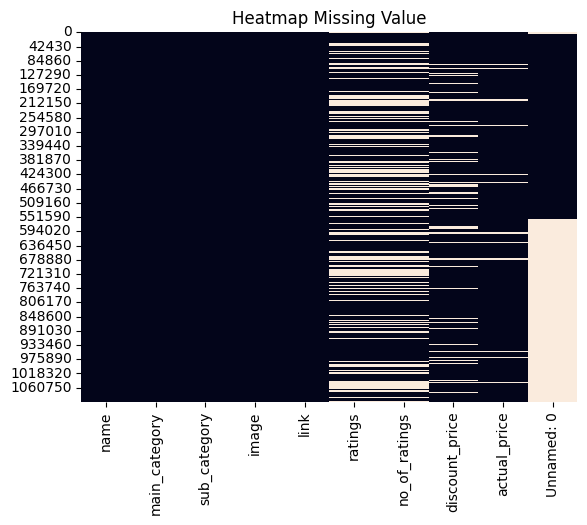

In [60]:
sns.heatmap(prod.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

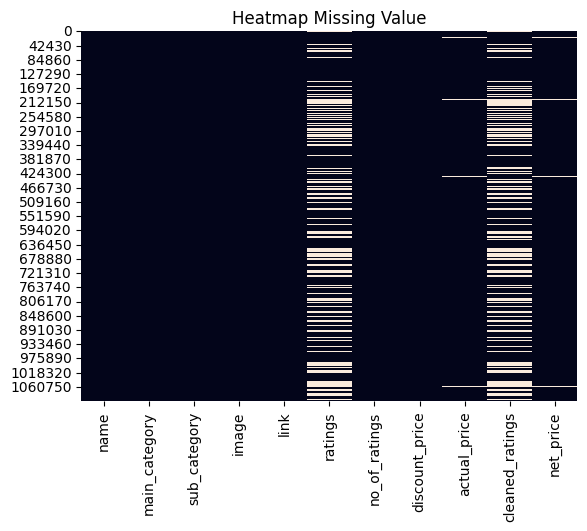

In [61]:
sns.heatmap(prod2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

**Duplikasi Data**

In [62]:
# mengecek apakah ada duplikat data
print(prod2.shape)
print("jumlah data yang duplikat", prod2.duplicated().sum())
prod2[prod2.duplicated() == True].head()

(1103170, 11)
jumlah data yang duplikat 533275


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cleaned_ratings,net_price
40176,Jaspo Kidzyy Steel Badminton Racquet with 6pc....,sports & fitness,Badminton,https://m.media-amazon.com/images/I/816z1d69TW...,https://www.amazon.in/Kidzyy-Badminton-Racquet...,3.4,3,426.0,800.0,3.4,374.0
40177,"Klapp Double Shaft Badminton Rackets, with 20 ...",sports & fitness,Badminton,https://m.media-amazon.com/images/I/71UA11w-Ci...,https://www.amazon.in/Klapp-Double-Badminton-R...,3.8,172,649.0,1899.0,3.8,1250.0
40178,Asics Gel-Courtmov+ Men's Badminton Shoe - Azu...,sports & fitness,Badminton,https://m.media-amazon.com/images/I/61oMT8Ddsa...,https://www.amazon.in/Asics-Gel-Courtmov-Mens-...,NaN,0,3219.0,3799.0,NaN,580.0
40179,FEROC Fighter Aluminum Badminton Racquet Set o...,sports & fitness,Badminton,https://m.media-amazon.com/images/I/6151mW348F...,https://www.amazon.in/Fighter-Aluminum-Badmint...,3.5,933,349.0,699.0,3.5,350.0
40180,Amazon Brand - Symactive Badminton Kit with 2 ...,sports & fitness,Badminton,https://m.media-amazon.com/images/I/812D6PJq1L...,https://www.amazon.in/Amazon-Brand-Symactive-S...,3.8,36,619.0,1179.0,3.8,560.0


In [63]:
# memastikan data duplikat
prod2[prod2['name'].isin(['Jaspo Kidzyy Steel Badminton Racquet with 6pc. Nylon Shuttle (Suitable for Kids)-Made in India (Orange)'])]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cleaned_ratings,net_price
1392,Jaspo Kidzyy Steel Badminton Racquet with 6pc....,sports & fitness,Badminton,https://m.media-amazon.com/images/I/816z1d69TW...,https://www.amazon.in/Kidzyy-Badminton-Racquet...,3.4,3,426.0,800.0,3.4,374.0
40176,Jaspo Kidzyy Steel Badminton Racquet with 6pc....,sports & fitness,Badminton,https://m.media-amazon.com/images/I/816z1d69TW...,https://www.amazon.in/Kidzyy-Badminton-Racquet...,3.4,3,426.0,800.0,3.4,374.0


In [64]:
# menghapus baris yang memiliki data duplikat
prod2.drop_duplicates(keep="first", inplace=True)
print(prod2.duplicated().sum()) # tidak ada lagi data duplikat
print(prod2.shape) # cek ulang data nya

0
(569895, 11)


In [65]:
#Check Deskriptif Statistik
prod2.describe().round(2)

,no_of_ratings,discount_price,actual_price,cleaned_ratings,net_price
count,569895.00,569895.00,5.518210e+05,387868.00,5.518210e+05
mean,555.70,2282.18,2.243814e+04,3.83,2.008122e+04
std,7009.58,8816.58,1.332737e+07,0.75,1.332736e+07
min,0.00,0.00,0.000000e+00,1.00,0.000000e+00
25%,0.00,299.00,9.980000e+02,3.50,4.100000e+02
50%,5.00,595.00,1.599000e+03,3.90,8.490000e+02
75%,51.00,1234.00,2.999000e+03,4.20,1.800000e+03
max,589547.00,1249990.00,9.900000e+09,5.00,9.899999e+09


## Visualisasi

In [66]:
prod2.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cleaned_ratings,net_price
0,Feel it Comfortable Leatherite Casual/Formal B...,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Feel-Comfortable-Leather...,4.1,46,551.0,999.0,4.1,448.0
1,Gliders (From Liberty) Womens Mac Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Gliders-Liberty-Womens-B...,4.1,813,0.0,399.0,4.1,399.0
2,Liberty Women ELENA-113 Casual BalletFlats,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Liberty-Elena-113-S-Blue...,2.6,3,303.0,399.0,2.6,96.0
3,Max Women Ballerina Sneaker,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Max-SU21WFBA2057PINK-Wom...,3.8,14,655.0,799.0,3.8,144.0
4,Walkaroo Womens Belly Shoe Ballet Flat,women's shoes,Ballerinas,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Walkaroo-Ladies-Grey-Bel...,4.2,5,0.0,319.0,4.2,319.0


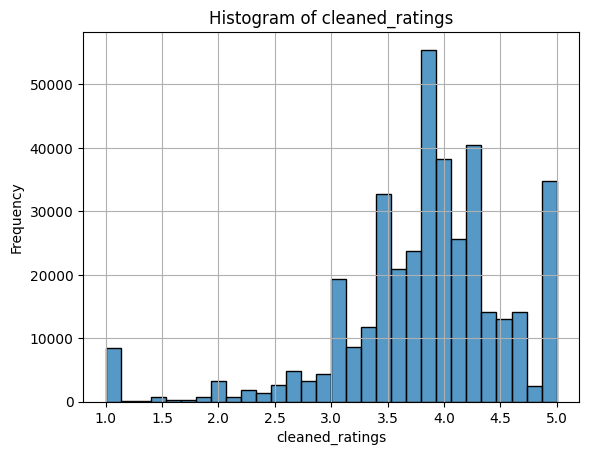

In [67]:
# Membuat histogram menggunakan variabel cleaned_ratings
sns.histplot(prod2['cleaned_ratings'], kde=False, bins=30, palette='Blues_d')
plt.title(f'Histogram of cleaned_ratings')
plt.xlabel('cleaned_ratings')
plt.ylabel('Frequency')
plt.grid(True)

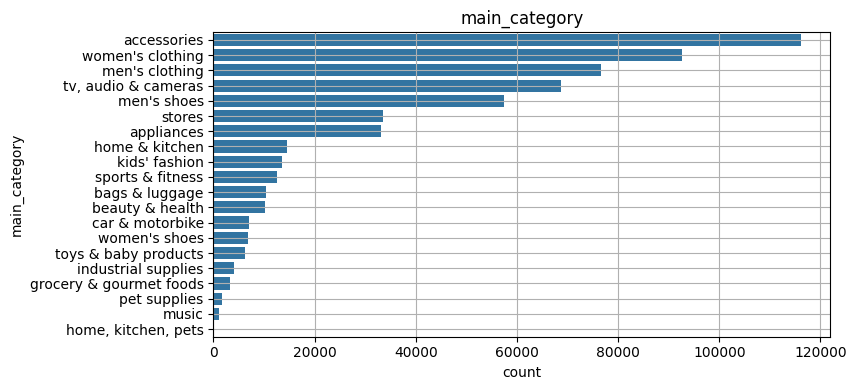

In [68]:
# visualisasi setiap variabel kategorik pada data

data_ = prod2[['main_category',	'sub_category']]
# Menghitung jumlah variabel kategorik
num_variables = len(data_.columns)

# Tentukan jumlah kolom dan baris untuk subplot
num_cols = 2
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Menggunakan Seaborn untuk membuat countplot atau pie chart
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = data_.columns[i]
        unique_vals = data_[col].nunique()  # Hitung jumlah kategori unik

        # Jika kategori lebih dari 30, lewati
        if unique_vals > 30:
            fig.delaxes(ax)
            continue

        # Gunakan pie chart untuk kategori kurang dari 3
        elif unique_vals < 3:
            data = data_[col].value_counts()
            ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data)))
            ax.set_title(f'{col} (Pie Chart)')
            ax.axis('equal')  # Agar pie chart berbentuk lingkaran

        # Gunakan countplot untuk kategori 3 hingga 15
        else:
            sns.countplot(y=col, data=data_, ax=ax, order=data_[col].value_counts(ascending=False).index)
            ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.grid(True)
plt.show()

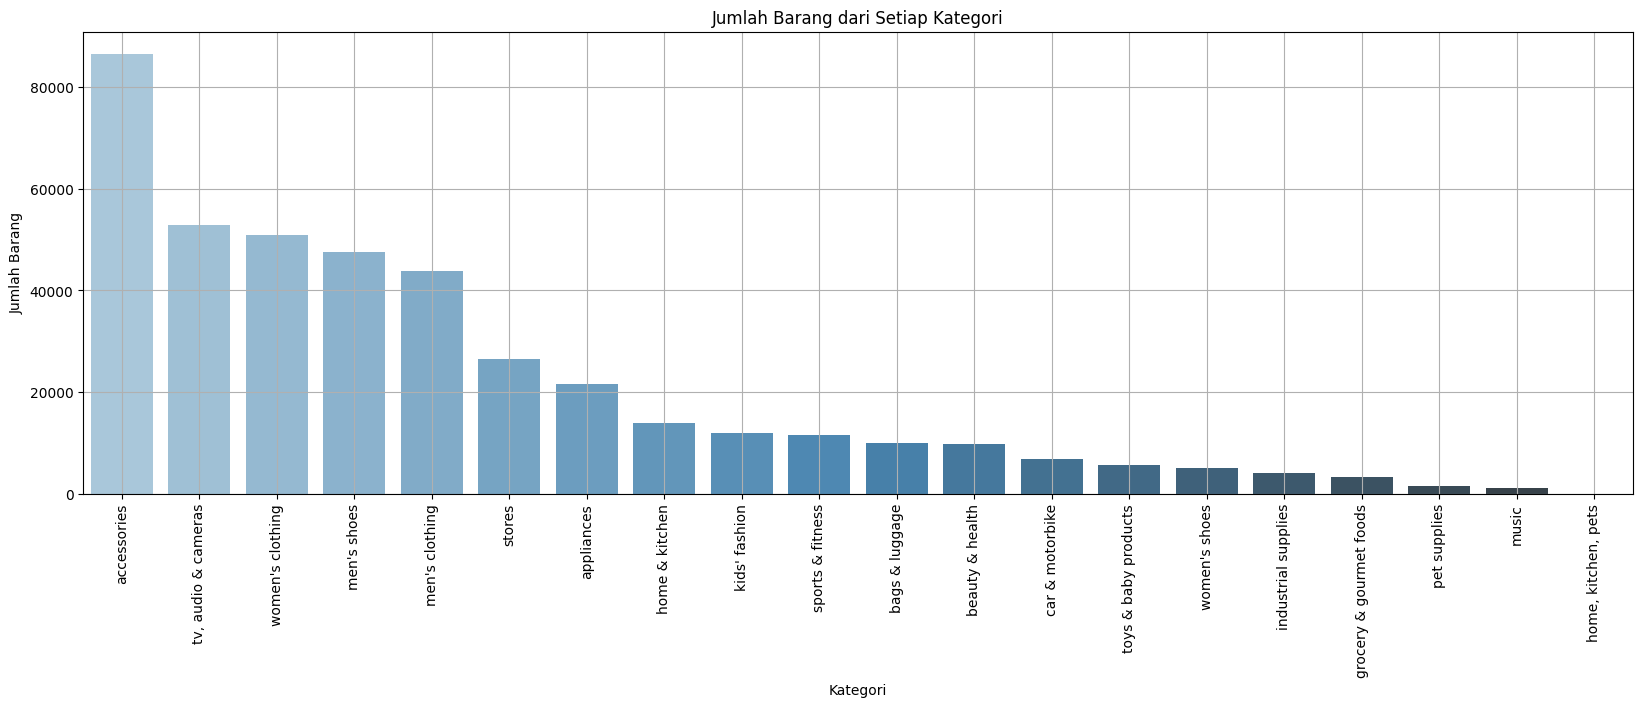

In [69]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah barang
grouped_data = prod2.groupby('main_category')['name'].nunique().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='name', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Barang dari Setiap Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Barang')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

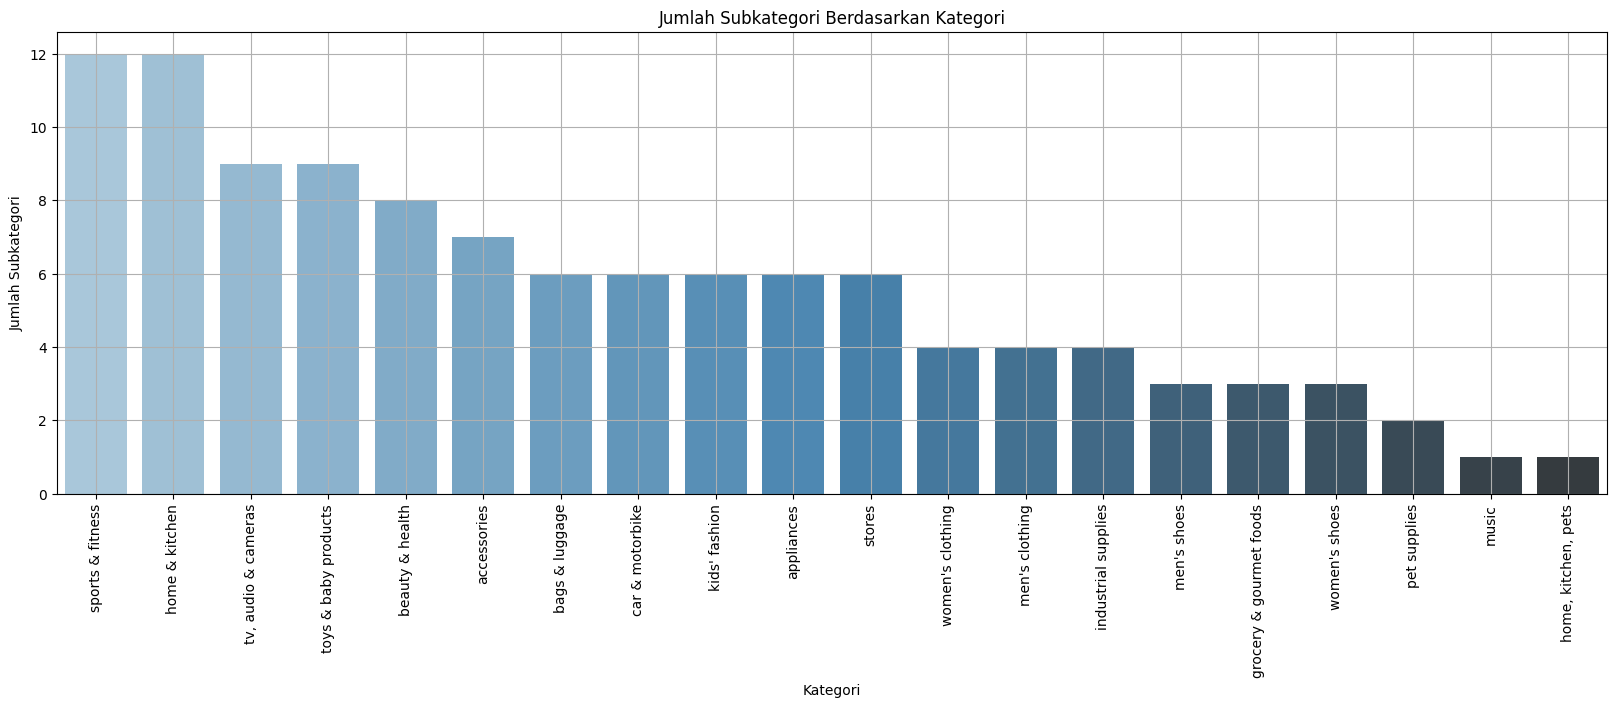

In [70]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah sub_category
grouped_data = prod2.groupby('main_category')['sub_category'].nunique().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='sub_category', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Subkategori Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Subkategori')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

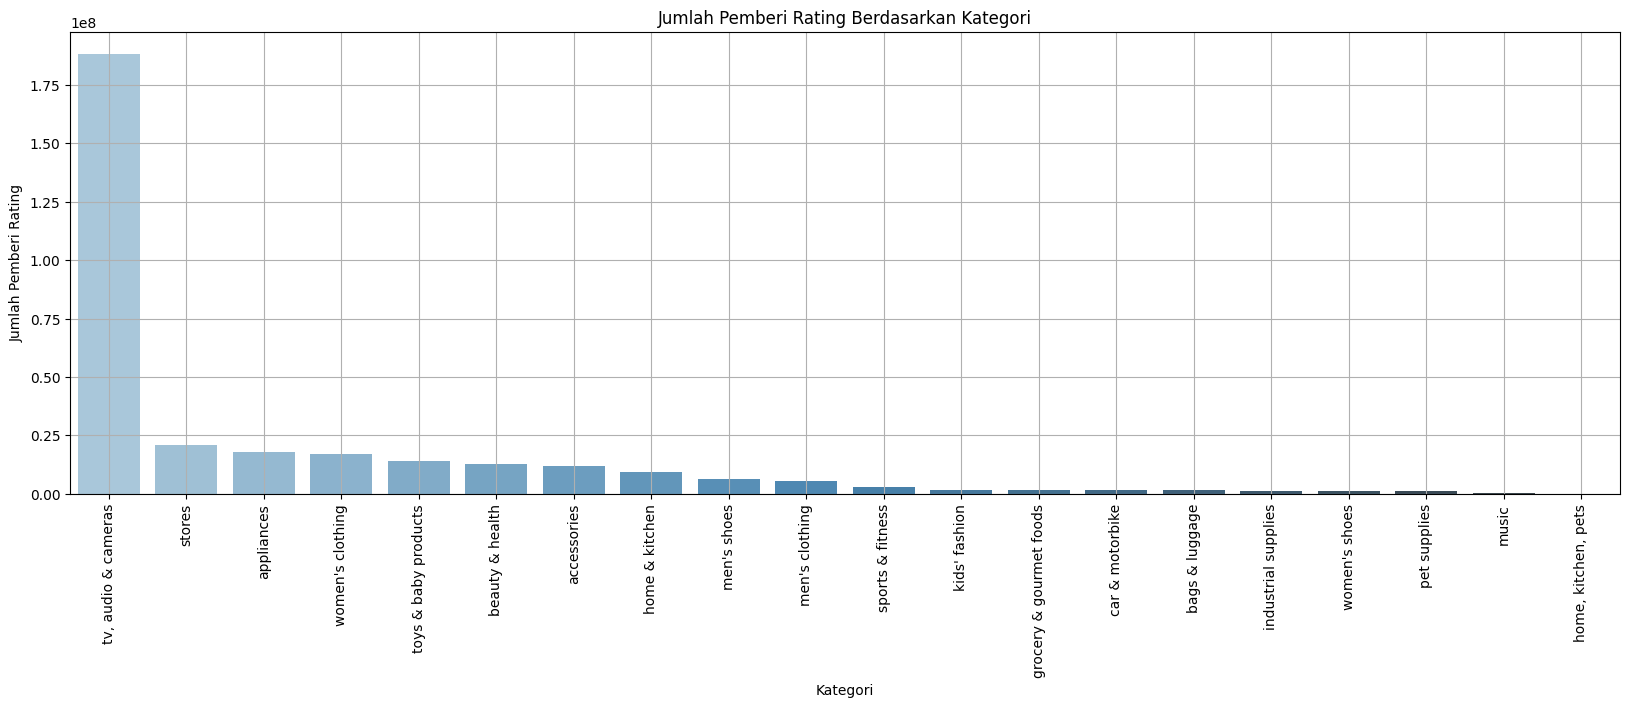

In [71]:
# Mengelompokkan data berdasarkan 'category' dan menghitung jumlah 'no_of_ratings'
grouped_data = prod2.groupby('main_category')['no_of_ratings'].sum().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='no_of_ratings', data=grouped_data, palette='Blues_d')
plt.title('Jumlah Pemberi Rating Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pemberi Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

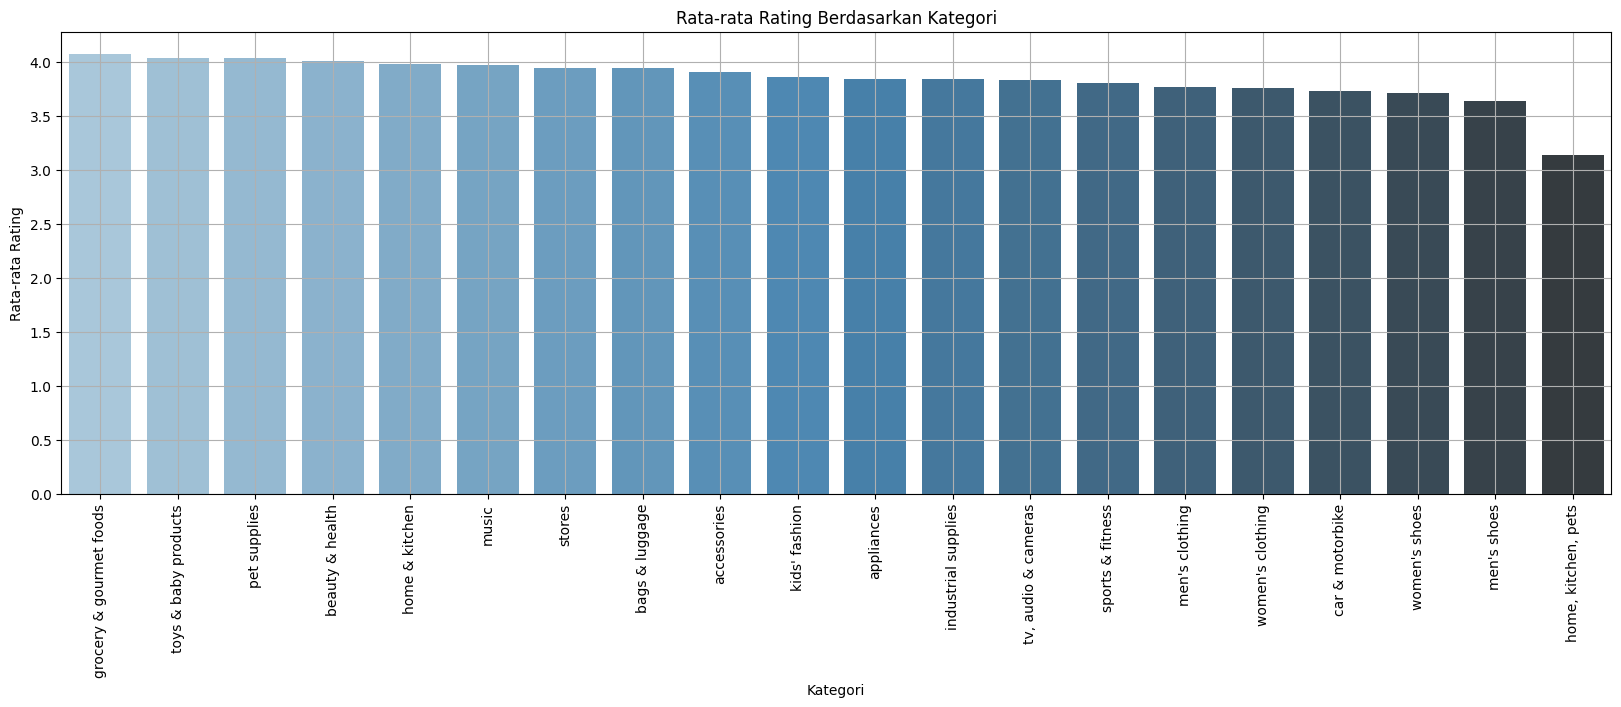

In [72]:
# Mengelompokkan data berdasarkan 'category' dan menghitung rata-rata ratings
grouped_data = prod2.groupby('main_category')['cleaned_ratings'].mean().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='main_category', y='cleaned_ratings', data=grouped_data, palette='Blues_d')
plt.title('Rata-rata Rating Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

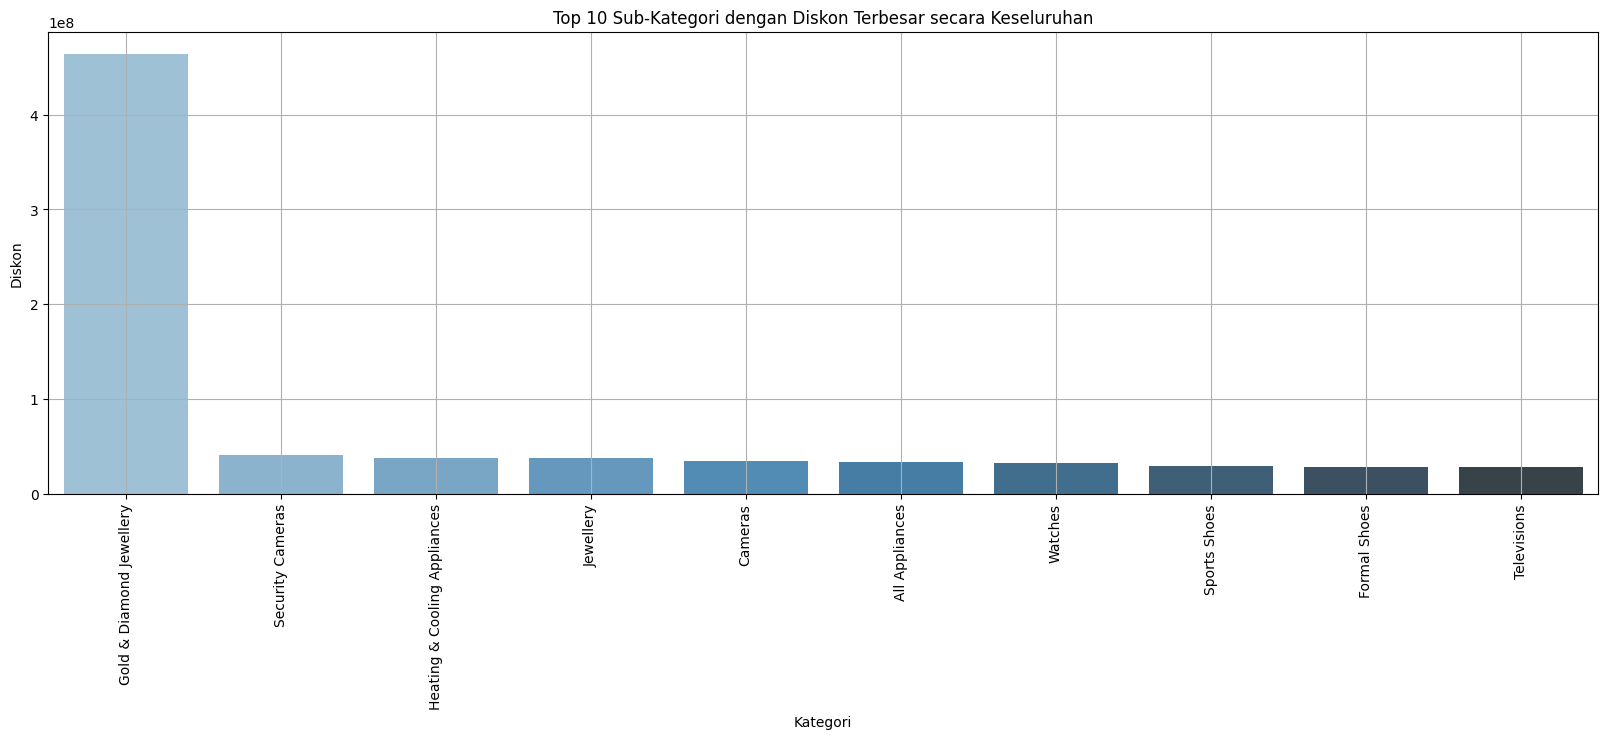

In [73]:
# Mengelompokkan data berdasarkan 'sub_category' dan menghitung jumlah diskon
grouped_data = prod2.groupby('sub_category')['discount_price'].sum().sort_values(ascending=False).reset_index().head(10)

# Membuat bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='sub_category', y='discount_price', data=grouped_data, palette='Blues_d')
plt.title('Top 10 Sub-Kategori dengan Diskon Terbesar secara Keseluruhan')
plt.xlabel('Kategori')
plt.ylabel('Diskon')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

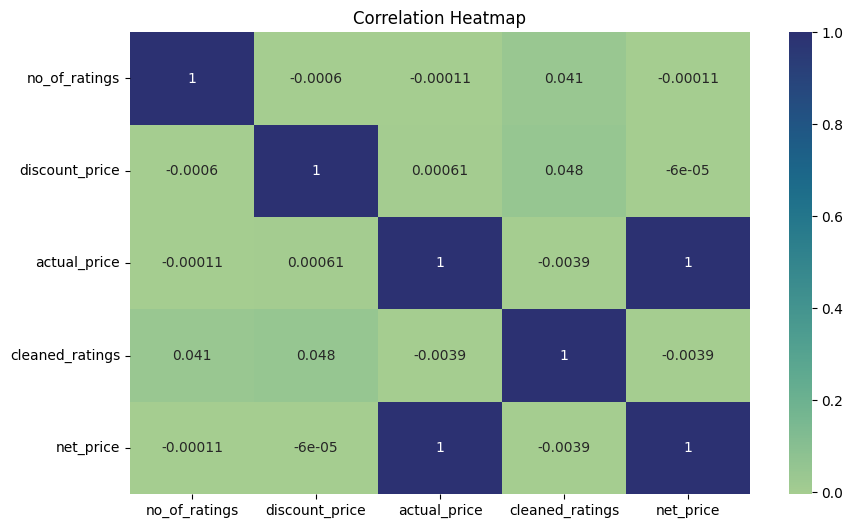

In [74]:
# Calculate correlations
correlations = prod2.select_dtypes(include = ['int', 'float']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()